In [100]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib
import matplotlib.pyplot as plt

In [101]:
import numpy as np
import pandas as pd

In [102]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [155]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [104]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [106]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [107]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Query database for precipitation information for the last 12 months

prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > 2017).order_by(Measurement.date.desc())
prcp[:5]
# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0)]

In [110]:
df = pd.read_sql_query(prcp.statement, engine)
df = df.set_index('date')
df.groupby('date')
df.head()


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


<IPython.core.display.Javascript object>


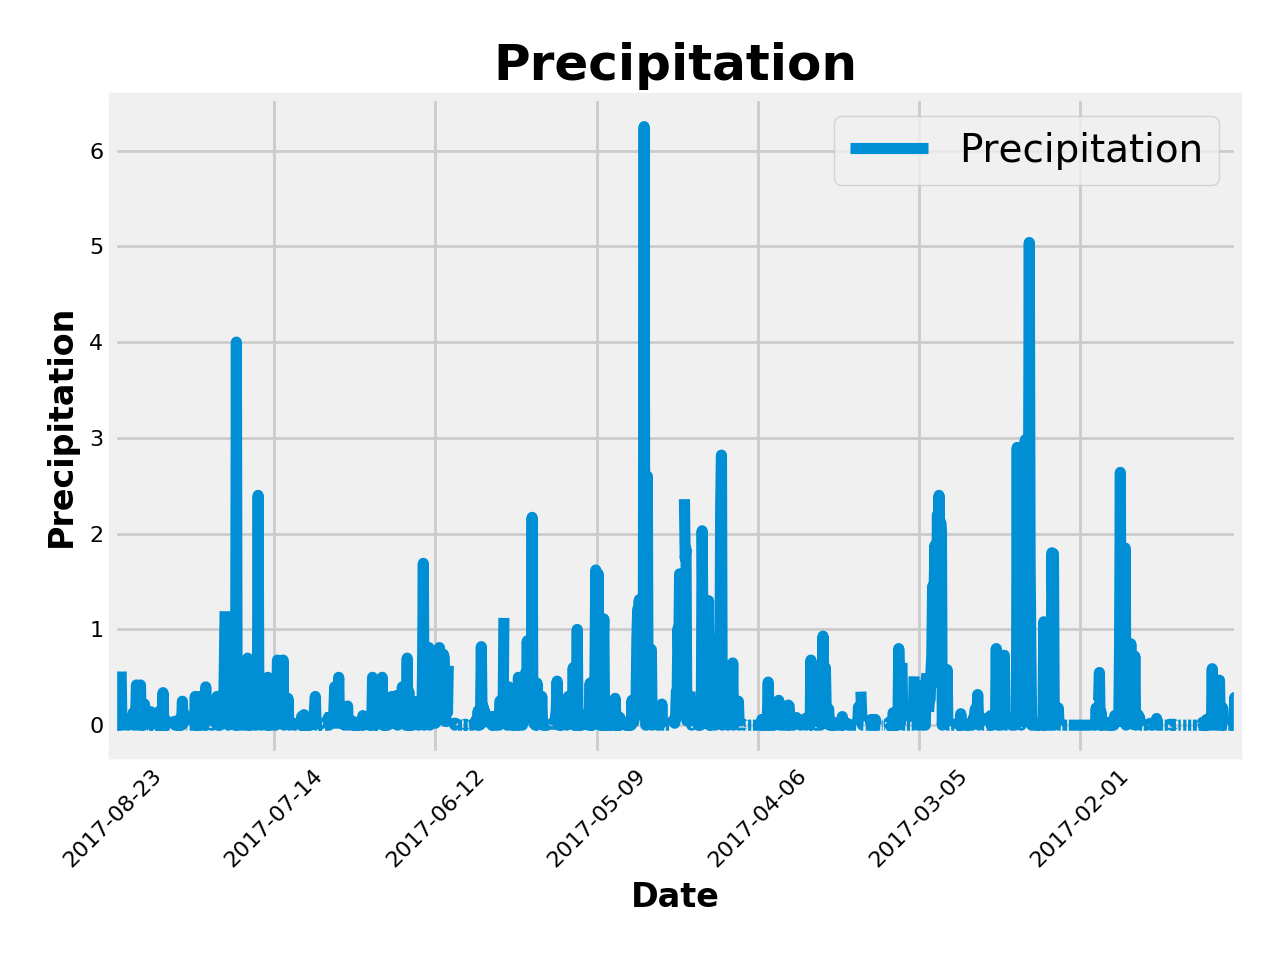

In [111]:
df.plot()
plt.xlabel("Date", weight = 'bold',size = 12)
plt.ylabel('Precipitation', weight='bold', size = 12)
plt.title("Precipitation", weight = 'bold', size = 18)
plt.legend(["Precipitation"])
plt.xticks(rotation=45, size = 8)
plt.yticks(size = 8)
plt.tight_layout()
plt.show()

In [112]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [113]:
# How many stations are available in this dataset?
station = session.query(Station.station,
                        Station.name)
                        
station.count()


9

In [114]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_act = session.query(Station.station,
                            Station.name,
                            Station.id,
                            Measurement.tobs,
                           (func.count(Measurement.prcp))).filter(Station.station== Measurement.station).group_by(Station.station).order_by(func.count(Measurement.prcp).desc())
station_act[::]

[('USC00519281', 'WAIHEE 837.5, HI US', 7, 78.0, 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2, 78.0, 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 1, 78.0, 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 6, 69.0, 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 9, 70.0, 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 3, 76.0, 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 8, 74.0, 1932),
 ('USC00517948', 'PEARL CITY, HI US', 4, 69.0, 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 5, 66.0, 342)]

In [115]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station
temps = session.query(Station.station, 
                     Station.id,
                      Station.name,
                      Measurement.date,
                     Measurement.tobs).filter(Measurement.date >= 2017).order_by(Measurement.tobs.desc())
highest_temp = temps[0]
lowest_temp = temps[-1]
avg_temp = session.query((func.avg(Measurement.tobs))).filter(Measurement.station == "USC00519281", Measurement.station == Station.station)
print(highest_temp)
print(lowest_temp)
temps[:5]


('USC00519397', 1, 'WAIKIKI 717.2, HI US', '2017-05-23', 87.0)
('USC00516128', 9, 'MANOA LYON ARBO 785.2, HI US', '2017-04-30', 58.0)


[('USC00519397', 1, 'WAIKIKI 717.2, HI US', '2017-05-23', 87.0),
 ('USC00519397', 1, 'WAIKIKI 717.2, HI US', '2017-07-03', 87.0),
 ('USC00513117', 2, 'KANEOHE 838.1, HI US', '2017-05-23', 87.0),
 ('USC00513117', 2, 'KANEOHE 838.1, HI US', '2017-07-03', 87.0),
 ('USC00514830',
  3,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  '2017-05-23',
  87.0)]

In [122]:
Counter(temperatures)

NameError: name 'Counter' is not defined

<IPython.core.display.Javascript object>


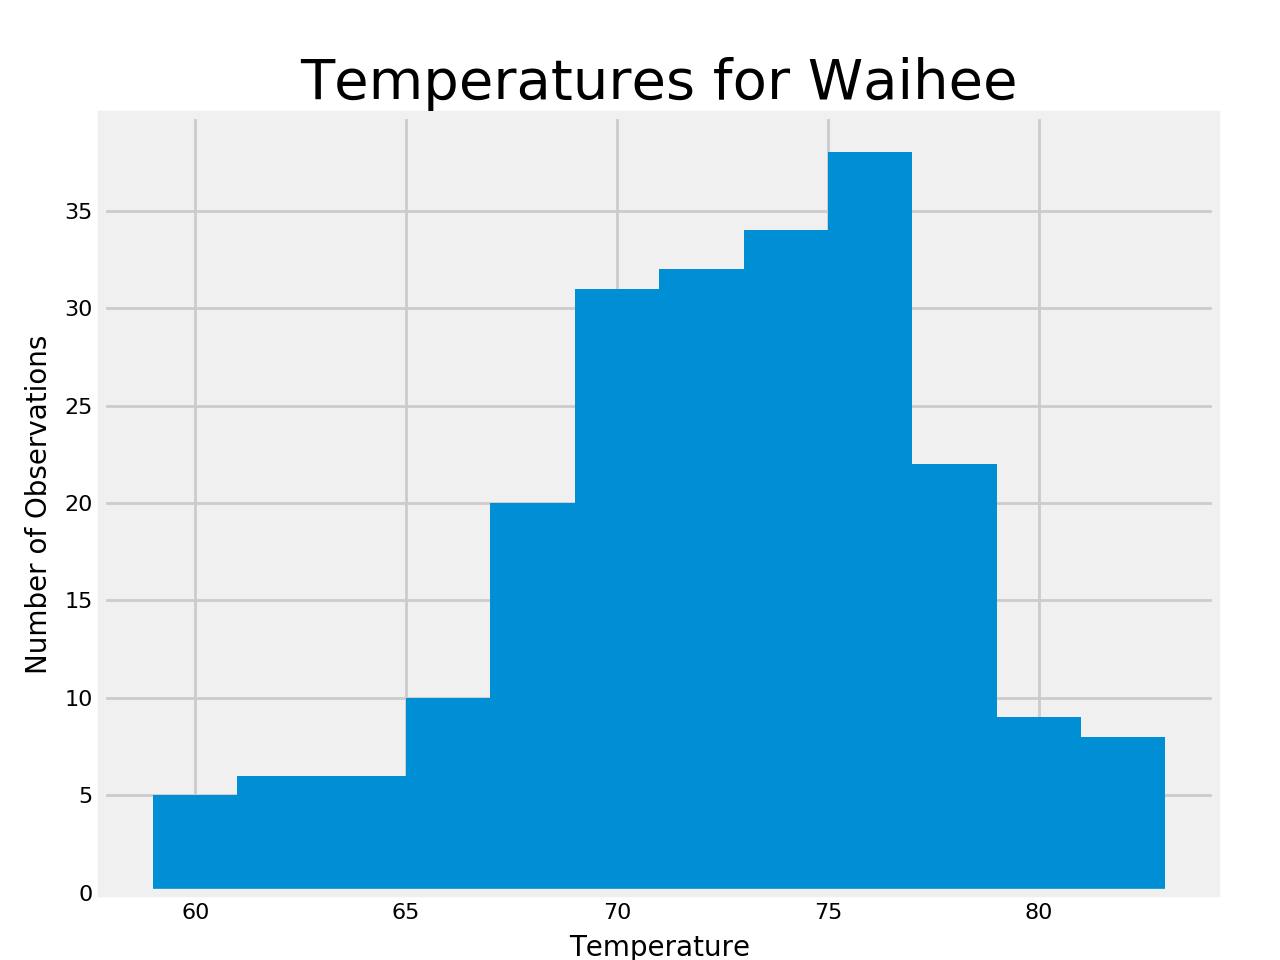

In [128]:
waihee_tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >=2017).all()

temperatures = ([temp[0] for temp in waihee_tobs])
plt.hist(temperatures, bins = 12)
plt.title("Temperatures for Waihee")
plt.ylabel('Number of Observations', size = 10)
plt.xlabel('Temperature', size = 10)
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.show()

In [123]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [135]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
last_year = calc_temps('2017-08-05', '2018-08-05')
last_year = last_year[0]


70.0

<IPython.core.display.Javascript object>


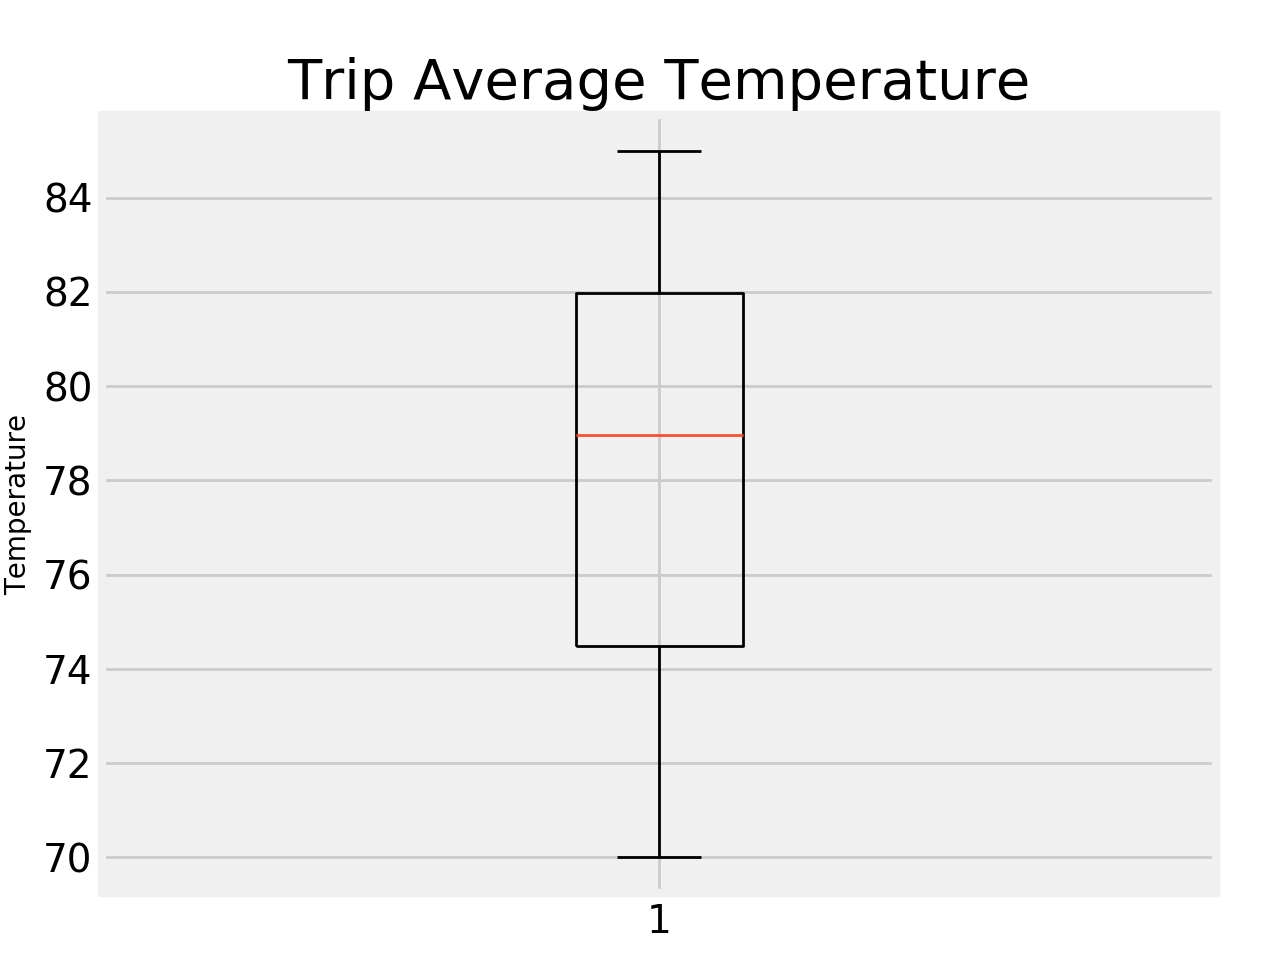

In [154]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr =(last_year[2] - last_year[0])

plt.boxplot(last_year)
plt.title('Trip Average Temperature')
plt.ylabel("Temperature", size = 10)
plt.show()

## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
